In [2]:
!pip install nc_time_axis

Defaulting to user installation because normal site-packages is not writeable
  Using cached nc_time_axis-1.4.1-py3-none-any.whl (17 kB)


In [1]:
# load netcdf from OM4 runs

import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
from matplotlib.colorbar import ColorbarBase
import cftime
# Library for working with tar files
import tarfile
import glob 
import cftime
import nc_time_axis

BASE = '/orcd/data/abodner/001/om4_output/'

In [2]:
# Unpack .tar files (only need to run this once)
# "file_list" is the list of .tar files to be unpacked
# "save_path" is the directory where unpacked .nc files will be saved

'''
def unpack_tar(file_list, save_path):
    for tar_file_name in file_list:
        tar = tarfile.open(tar_file_name)
        tar.extractall(path=save_path)
        tar.close()
        
        
# extract netcdf files from .tar

file_list = glob.glob(BASE+'thetaoga/tar_files/*_thetaoga.tar')
save_path = BASE

unpack_tar(file_list, save_path)
print('Done!')
'''

"\ndef unpack_tar(file_list, save_path):\n    for tar_file_name in file_list:\n        tar = tarfile.open(tar_file_name)\n        tar.extractall(path=save_path)\n        tar.close()\n        \n        \n# extract netcdf files from .tar\n\nfile_list = glob.glob(BASE+'thetaoga/tar_files/*_thetaoga.tar')\nsave_path = BASE\n\nunpack_tar(file_list, save_path)\nprint('Done!')\n"

In [3]:
# paths to dataset
BASE = '/orcd/data/abodner/001/om4_output/'

# load BFF11 data 
thetaoga_BFF11 = xr.open_mfdataset(BASE+'thetaoga/254/*.nc')  

# load BOD23 data 
thetaoga_BOD23 = xr.open_mfdataset(BASE+'thetaoga/262/*.nc')  

# load BOD23 data tuned to match global temp
thetaoga_BOD23_tuned = xr.open_mfdataset(BASE+'thetaoga/265/*.nc')  

## plot thetaoga timeseries

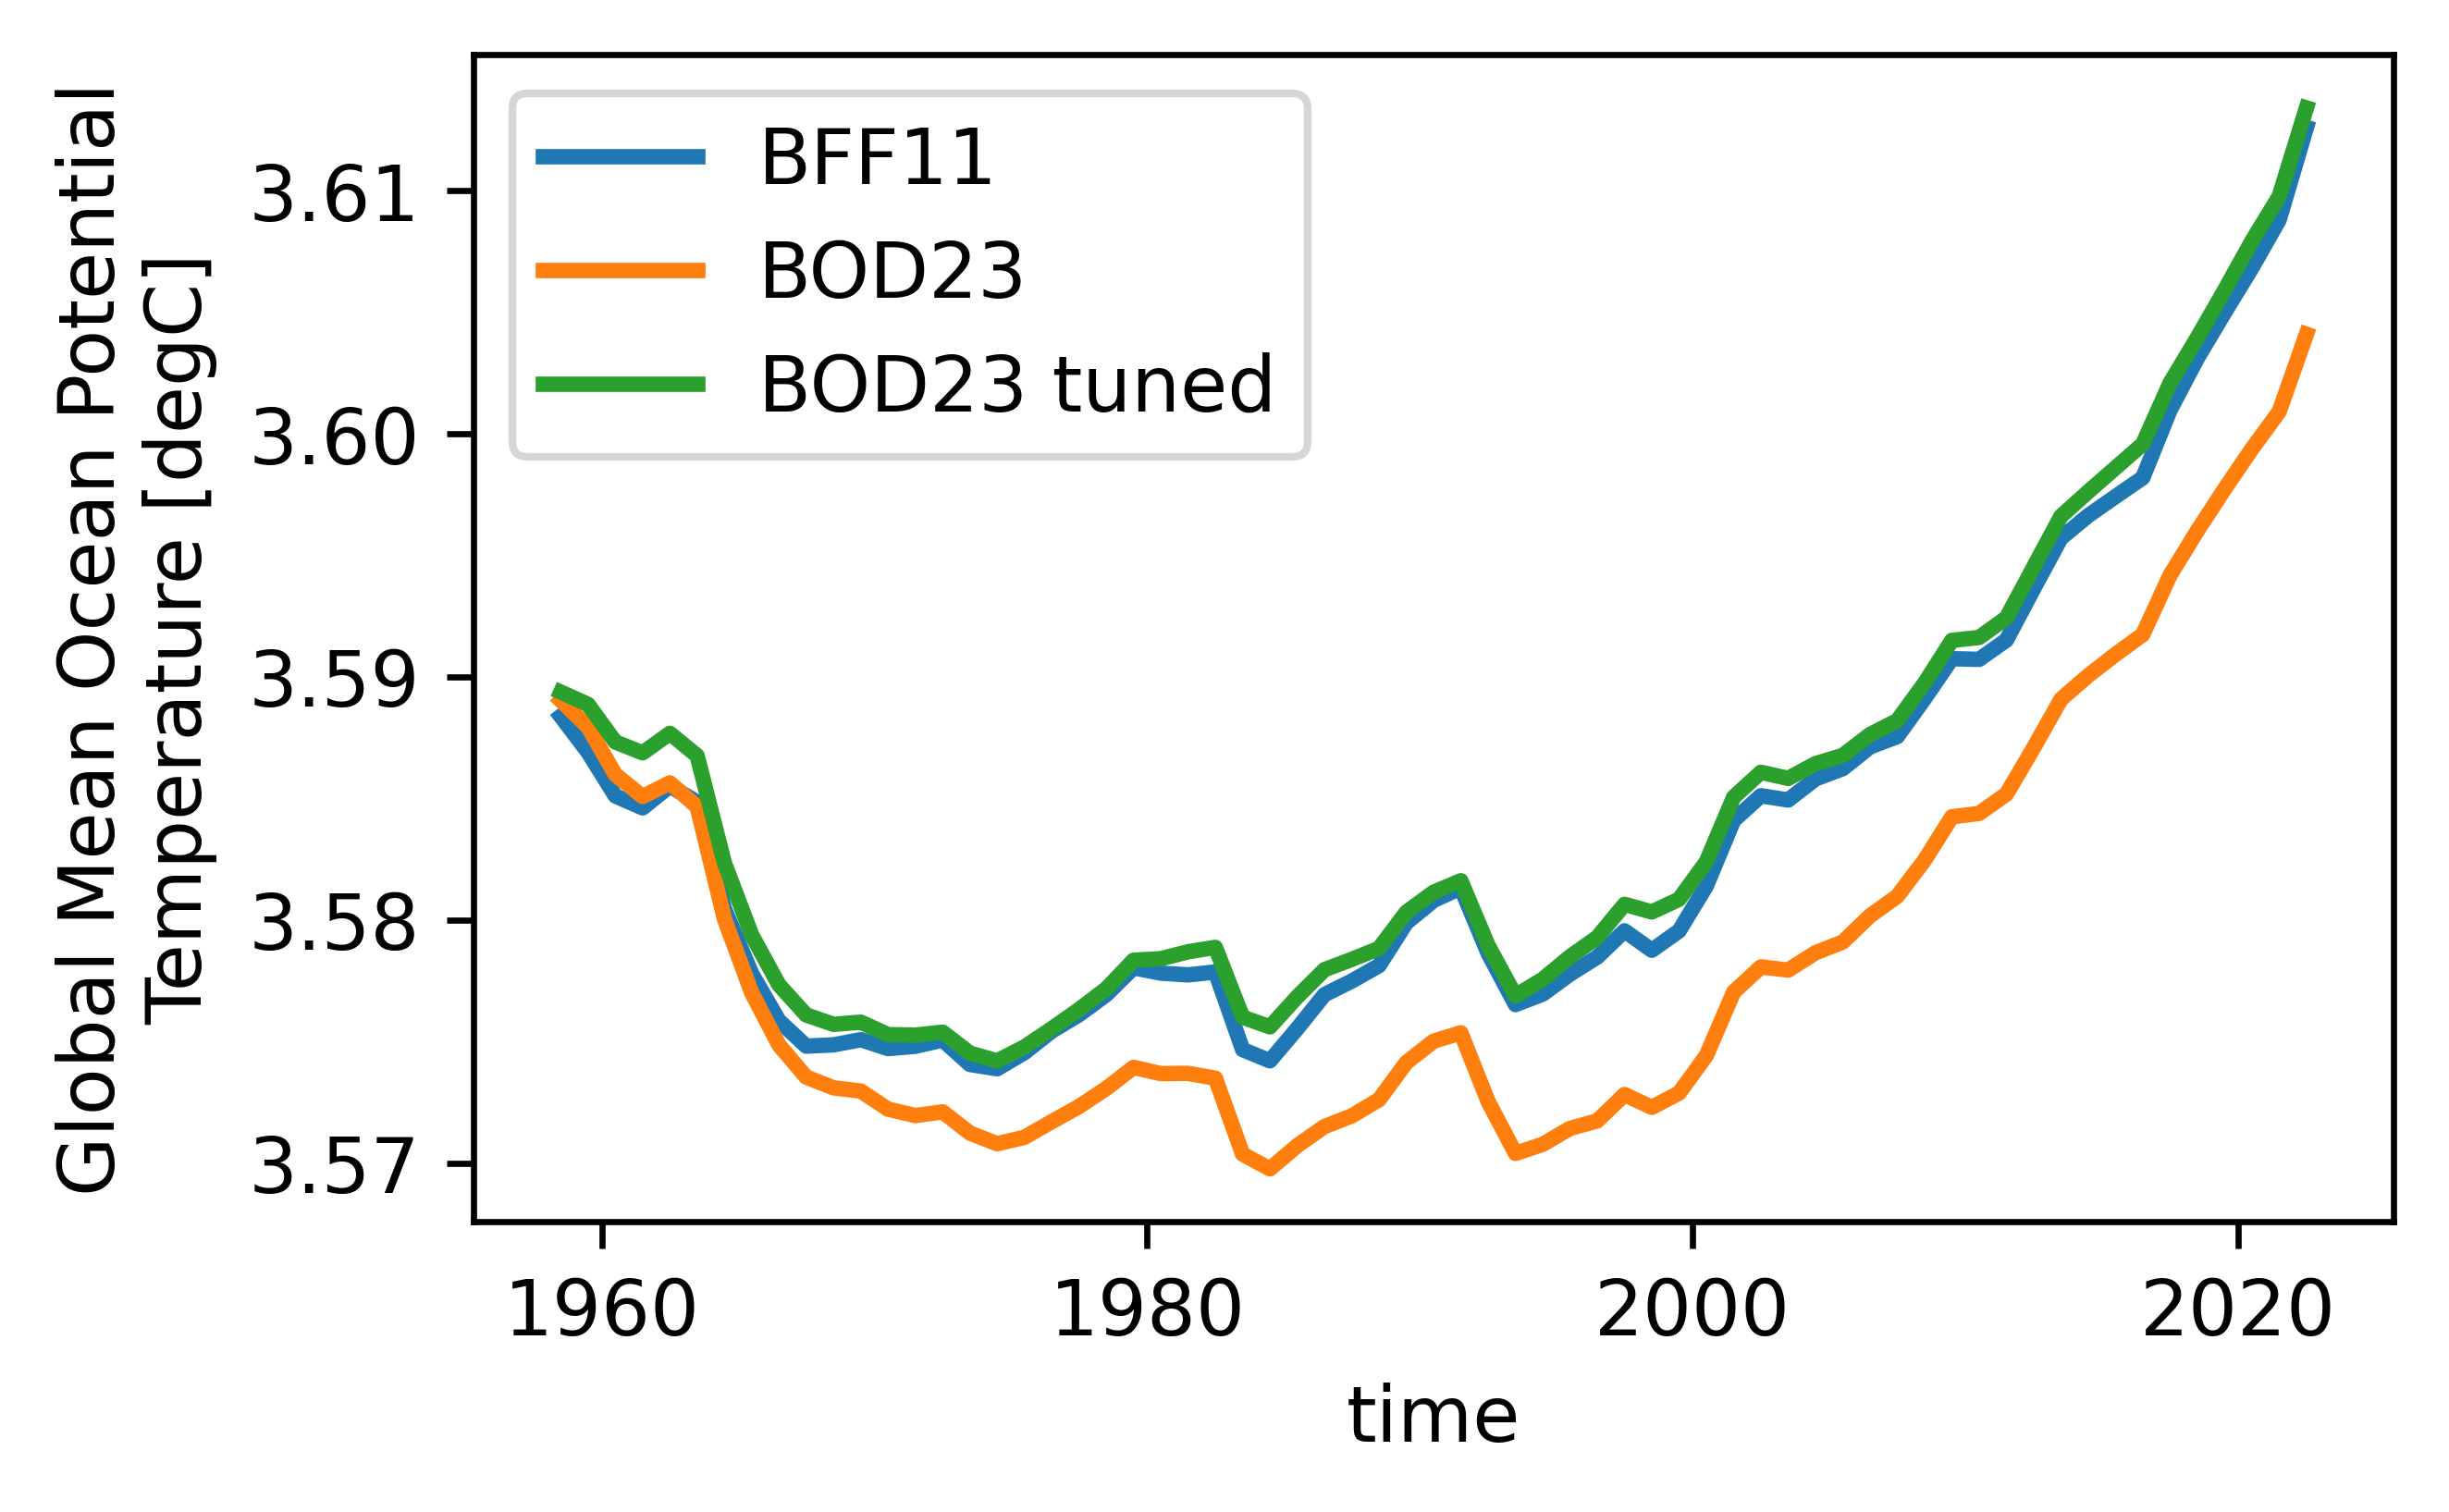

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.5), dpi=600)
fig.tight_layout(pad=4.0)
thetaoga_BFF11.thetaoga.plot(label='BFF11', linewidth =2)
thetaoga_BOD23.thetaoga.plot(label='BOD23', linewidth =2)
thetaoga_BOD23_tuned.thetaoga.plot(label='BOD23 tuned', linewidth =2)
plt.legend()

# save figure
plt.savefig('./figures/thetaoga')